## **DSN BOOTCAMP HACKATHON**


<img style="display: block; margin: 0 auto;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTmHNp5ox0u3HNMQZ_UMN8OicEwGuV6AqHkHQ&s" width="1000" height="200"/>

## **PROBLEM OVERVIEW**

> Welcome to the 2024 DSN Artificial Intelligence Bootcamp Machine Translation Hackathon! 🌍💻 In this exciting competition, participants are tasked with developing models to translate text from English to Yoruba, one of the major low-resource languages spoken by over 50 million people.

> Machine translation plays a pivotal role in natural language processing (NLP) by breaking down language barriers and fostering cross-cultural communication. This challenge offers a unique opportunity to push the boundaries of AI, building models that enhance global interaction and facilitate knowledge sharing.

<img style="display: block; margin: 0 auto;" src="https://kamelitravel.com/wp-content/uploads/2023/12/Idanre.jpg" width="1500" height="500"/>

> Participants will utilize a bilingual dataset to train machine learning models capable of accurately translating sentences from English into Yoruba. The goal is to ensure fluency, accuracy, and cultural context in translations, contributing to the development of tools that bridge linguistic divides and improve accessibility to information for Yoruba speakers worldwide.

## **Table of Contents**



1.   Environment setup and Packages Installation
2.   Libraries, Configurations and Utilities
3.   Exploratory Data Analysis (EDA)
4.   Feature Engineering
5.   Hyperparameter Tuning and Feature Selection
6.   Ensembling
7.   Conclusion

## **SETUP**

**Google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Libraries Installation**

In [2]:
!pip install --upgrade simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 112.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 117.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.5 MB/s eta 0:00:00


In [3]:
%%capture
!pip install evaluate
!pip install sacrebleu

In [4]:
%%capture
!pip install colorama

## **Libraries**

In [5]:
import logging
import os
import random

import torch
import numpy as np
import pandas as pd

from simpletransformers.t5 import T5Model, T5Args
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

import warnings
warnings.filterwarnings("ignore")

In [6]:
import unicodedata
import matplotlib.pyplot as plt
import evaluate

In [7]:
from colorama import Fore, Style

## **Config**

In [8]:
seed_value = 2024

random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)

if torch.cuda.is_available():
  torch.cuda.manual_seed(seed_value)
  torch.cuda.manual_seed_all(seed_value)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

## **UTILS**

In [9]:
bleu = evaluate.load("sacrebleu")

In [10]:
def load_and_preprocess_data(input_dir):
    """Load data from CSV, normalize and filter it."""
    # Example dataset paths
    train_file = os.path.join(input_dir, 'train_data.tsv')
    val_file = os.path.join(input_dir, 'dev_data.tsv')
    test_file = os.path.join(input_dir, 'test_data.tsv')

    # Load the training data
    train_dataset = pd.read_csv (train_file, sep='\t')
    val_dataset = pd.read_csv(val_file, sep='\t')
    test_dataset = pd.read_csv(test_file, sep='\t')

    return train_dataset, val_dataset, test_dataset

## **DATASET**

In [11]:
# 1. Load and preprocess the dataset
input_dir = '/content/drive/MyDrive/Colab Notebooks/Bootcamp/Data'

## Dataset
train_dataset, val_dataset, test_dataset = load_and_preprocess_data(input_dir)

In [12]:
print(f"Size of Train dataset: {len(train_dataset)}")
print(f"Size of Validation dataset: {len(val_dataset)}")
print(f"Size of Test dataset: {len(test_dataset)}")

Size of Train dataset: 10070
Size of Validation dataset: 3397
Size of Test dataset: 6633


## **DATA EXPLORATION**

In [13]:
train_dataset.head()

,English,Yoruba
0,Unit 1: What is Creative Commons?,﻿Ìdá 1: Kín ni Creative Commons?
1,This work is licensed under a Creative Commons...,Iṣẹ́ yìí wà lábẹ́ àṣẹ Creative Commons Attribu...
2,"Creative Commons is a set of legal tools, a no...",Creative Commons jẹ́ àwọn ọ̀kan-ò-jọ̀kan ohun-...
3,Creative Commons began in response to an outda...,Creative Commons bẹ̀rẹ̀ láti wá wọ̀rọ̀kọ̀ fi ṣ...
4,CC licenses are built on copyright and are des...,Àwọn àṣẹ CC jẹ mọ́ àṣẹ ẹni tí ó ní iṣẹ́-àtinúd...


In [14]:
idx = 1

# Print English in one color and Yoruba in another
print(f"{Fore.GREEN}English: {train_dataset['English'][idx]}{Style.RESET_ALL}")
print(f"{Fore.BLUE}Yoruba: {train_dataset['Yoruba'][idx]}{Style.RESET_ALL}")

English: This work is licensed under a Creative Commons Attribution 4.0 International License.
Yoruba: Iṣẹ́ yìí wà lábẹ́ àṣẹ Creative Commons Attribution 4.0 International License.


**ANALYSIS**

**Check for Duplicates**

In [15]:
train_duplicates = train_dataset.duplicated(subset=['English', 'Yoruba'])
val_duplicates = val_dataset.duplicated(subset=['English', 'Yoruba'])

print(f"Number of duplicate sentence pairs (Train): {train_duplicates.sum()}")
print(f"Number of duplicate sentence pairs (Validation): {val_duplicates.sum()}")

Number of duplicate sentence pairs (Train): 76
Number of duplicate sentence pairs (Validation): 45


**Observation**

- The `Train` data contains 76 duplicate Sentence Pairs
- The `Validation` data contains 45 duplicate Sentence Pairs

In [16]:
data = pd.DataFrame()

data['eng_len'] = train_dataset['English'].apply(lambda x: len(x.split()))
data['yor_len'] = train_dataset['Yoruba'].apply(lambda x: len(x.split()))

**Length of sentences**

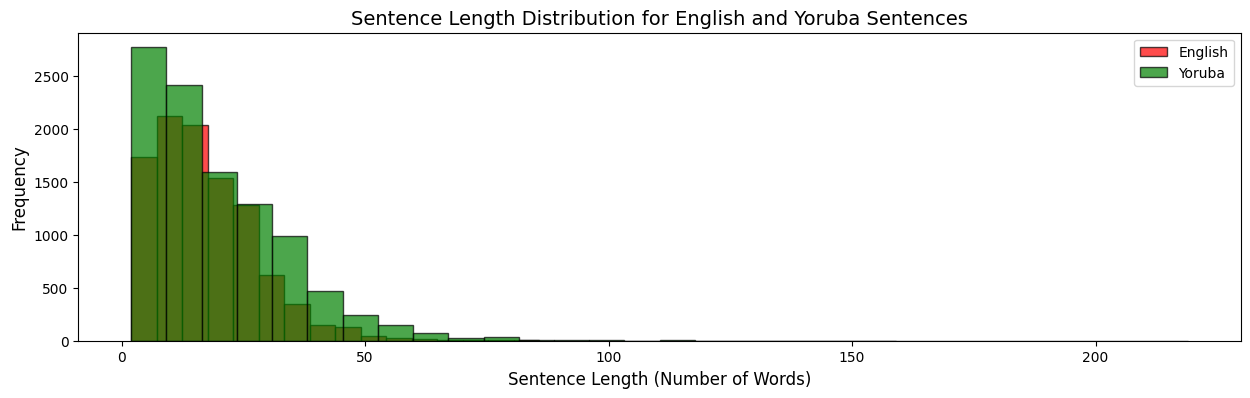

In [17]:
plt.figure(figsize=(15, 4))

plt.hist(data['eng_len'], bins=30, alpha=0.7, label='English', color='red', edgecolor='black')
plt.hist(data['yor_len'], bins=30, alpha=0.7, label='Yoruba', color='green', edgecolor='black')

plt.title('Sentence Length Distribution for English and Yoruba Sentences', fontsize=14)
plt.xlabel('Sentence Length (Number of Words)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

**Observations**:
- The majority of both English and Yoruba sentences are short, typically between 0-25 words.
- Yoruba sentences tend to be slightly longer on average than English sentences.
- The distributions for both languages are skewed, with fewer longer sentences.

**Vocabulary Analysis**

In [18]:
eng_vocab = set(" ".join(train_dataset['English']).split())
yor_vocab = set(" ".join(train_dataset['Yoruba']).split())

print(f"{Fore.RED}English Vocabulary Size: {len(eng_vocab)}{Style.RESET_ALL}")
print(f"{Fore.BLUE}Yoruba Vocabulary Size: {len(yor_vocab)}{Style.RESET_ALL}")

English Vocabulary Size: 26359
Yoruba Vocabulary Size: 23990


**Most frequent words**

In [19]:
from collections import Counter
eng_freq = Counter(" ".join(train_dataset['English']).split())
yor_freq = Counter(" ".join(train_dataset['Yoruba']).split())

print(f"{Fore.RED}Top 10 most frequent English words: {eng_freq.most_common(10)}{Style.RESET_ALL}")
print(f"{Fore.BLUE}Top 10 most frequent Yoruba words: {yor_freq.most_common(10)}{Style.RESET_ALL}")

Top 10 most frequent English words: [('the', 9838), ('of', 4852), ('to', 4794), ('and', 3976), ('in', 3541), ('a', 3226), ('is', 2105), ('that', 2069), ('for', 1609), ('The', 1519)]
Top 10 most frequent Yoruba words: [('tí', 4480), ('àwọn', 4005), ('ní', 3944), ('tó', 3753), ('ń', 3668), ('wọ́n', 2567), ('ó', 2385), ('ṣe', 2249), ('ti', 2158), ('pé', 2018)]


In [20]:
data['length_ratio'] = data['eng_len'] / data['yor_len']
print(data['length_ratio'].describe())

count    10070.000000
mean         1.002776
std          0.453976
min          0.114286
25%          0.714286
50%          0.888889
75%          1.157895
max          6.500000
Name: length_ratio, dtype: float64


**Observation**:
- The mean length ratio of English to Yoruba sentences is approximately 1.0028, indicating that on average, both languages have similar sentence lengths.
- The minimum ratio is 0.114, meaning some English sentences are much shorter than their Yoruba counterparts, while the maximum ratio of 6.5 shows that some English sentences are significantly longer.

## **Data Processing**

In [21]:
# Remove any possible duplicates
train = train_dataset.drop_duplicates(subset=["Yoruba", "English"])
val = val_dataset.drop_duplicates(subset=["Yoruba", "English"])

# Remove trailing spaces
train["Yoruba"] = train["Yoruba"].apply(lambda x: x.strip())
train["English"] = train["English"].apply(lambda x: x.strip())

val["Yoruba"] = val["Yoruba"].apply(lambda x: x.strip())
val["English"] = val["English"].apply(lambda x: x.strip())

train.columns = ["input_text", "target_text"]
val.columns = ["input_text", "target_text"]

In [22]:
train_df = train
eval_df = val

train_df["prefix"] = ""
eval_df["prefix"] = ""

In [23]:
train.head()

,input_text,target_text,prefix
0,Unit 1: What is Creative Commons?,﻿Ìdá 1: Kín ni Creative Commons?,
1,This work is licensed under a Creative Commons...,Iṣẹ́ yìí wà lábẹ́ àṣẹ Creative Commons Attribu...,
2,"Creative Commons is a set of legal tools, a no...",Creative Commons jẹ́ àwọn ọ̀kan-ò-jọ̀kan ohun-...,
3,Creative Commons began in response to an outda...,Creative Commons bẹ̀rẹ̀ láti wá wọ̀rọ̀kọ̀ fi ṣ...,
4,CC licenses are built on copyright and are des...,Àwọn àṣẹ CC jẹ mọ́ àṣẹ ẹni tí ó ní iṣẹ́-àtinúd...,


In [24]:
val.head()

,input_text,target_text,prefix
0,"We prepare the saddle, and the goat presents i...",A di gàárì sílẹ̀ ewúrẹ́ ń yọjú; ẹrù ìran rẹ̀ ni?,
1,"You have been crowned a king, and yet you make...",A fi ọ́ jọba ò ń ṣàwúre o fẹ́ jẹ Ọlọ́run ni?,
2,By dancing we take possession of Awà; through ...,"A fijó gba Awà; a fìjà gba Awà; bí a ò bá jó, ...",
3,We lift a saddle and the goat (kin) scowls; it...,A gbé gàárì ọmọ ewúrẹ́ ń rojú; kì í ṣe ẹrù àgù...,
4,One does not share a farm boundary with a king...,A kì í bá ọba pàlà kí ọkọ́ ọba má ṣánni lẹ́sẹ̀.,


In [25]:
train["target_text"].apply(lambda x: len(x.split())).max(), train["input_text"].apply(lambda x: len(x.split())).max()

(219, 159)

## **Model Training**

In [ ]:
model_args = T5Args()
model_args.use_hf_datasets = False
model_args.max_seq_length = 150
model_args.train_batch_size = 4
model_args.eval_batch_size = 4
model_args.num_train_epochs = 7
model_args.evaluate_during_training    = True
model_args.evaluate_during_training_verbose = True
model_args.use_multiprocessing = False
model_args.fp16 = False
model_args.feed_forward_proj = "gated-gelu"
model_args.dropout_rate = 0.02
model_args.dataloader_num_workers = 0
model_args.save_eval_checkpoints = False
model_args.no_cache = True
model_args.reprocess_input_data  = True
model_args.overwrite_output_dir = True
model_args.preprocess_inputs = False
model_args.num_return_sequences  = 1
model_args.gradient_accumulation_steps = 1
model_args.manual_seed = 2024
model_args.max_length = 180
model_args.evaluate_generated_text = False
model_args.optimizer = 'AdamW'
model_args.scheduler = 'cosine_with_hard_restarts_schedule_with_warmup'
model_args.use_early_stopping = True
model_args.warmup_steps = 100
model_args.num_beams = 9
model_args.learning_rate = 0.000017
model_args.save_best_model = True
model_args.no_save = False
model_args.save_steps = -1
model_args.save_model_every_epoch = True    # Save the model after every epoch
model_args.num_heads = 12
model_args.warmup_ratio = 0.15
model_args.vocab_size = 90000
model_args.early_stopping_patience = 3
model_args.output_dir = "/content/drive/MyDrive/Colab Notebooks/Bootcamp/Data/"
model_args.best_model_dir   = "/content/drive/MyDrive/Colab Notebooks/Bootcamp/Data/best-model"

model = T5Model("mt5", "Davlan/mt5_base_eng_yor_mt",
                args=model_args)

config.json:   0%|          | 0.00/673 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/351 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
model.train_model(train_df, eval_data=eval_df)

  0%|          | 0/9994 [00:00<?, ?it/s]

Epoch:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 1 of 7:   0%|          | 0/2499 [00:00<?, ?it/s]

  0%|          | 0/3352 [00:00<?, ?it/s]

  0%|          | 0/3352 [00:00<?, ?it/s]

Running Epoch 2 of 7:   0%|          | 0/2499 [00:00<?, ?it/s]

  0%|          | 0/3352 [00:00<?, ?it/s]

  0%|          | 0/3352 [00:00<?, ?it/s]

Running Epoch 3 of 7:   0%|          | 0/2499 [00:00<?, ?it/s]

  0%|          | 0/3352 [00:00<?, ?it/s]

  0%|          | 0/3352 [00:00<?, ?it/s]

Running Epoch 4 of 7:   0%|          | 0/2499 [00:00<?, ?it/s]

  0%|          | 0/3352 [00:00<?, ?it/s]

  0%|          | 0/3352 [00:00<?, ?it/s]

Running Epoch 5 of 7:   0%|          | 0/2499 [00:00<?, ?it/s]

  0%|          | 0/3352 [00:00<?, ?it/s]

  0%|          | 0/3352 [00:00<?, ?it/s]

  0%|          | 0/3352 [00:00<?, ?it/s]

Running Epoch 6 of 7:   0%|          | 0/2499 [00:00<?, ?it/s]

## **TRAINING TIME** `Approximately 4 Hours`

## **Prediction and Submission**

In [26]:
from simpletransformers.t5 import T5Model, T5Args

# Load the trained model from the saved checkpoint
model_args = T5Args()
model_args.max_length = 180
model_args.num_beams = 9
model_args.eval_batch_size = 4

In [ ]:
# Load the model from the best checkpoint
model = T5Model("mt5", "/content/drive/MyDrive/Colab Notebooks/Bootcamp/Data/mt5/best_model", args=model_args)

In [ ]:
# Define the input text for translation (English sentence)
input_text = "I want to go to school."

# Use the model to predict the translation (English to Yoruba)
predictions = model.predict([input_text])

# Print the prediction
print(f"Translated Text (Yoruba): {predictions[0]}")

In [ ]:
# Define the input text for translation (English sentence)
input_text_2 = "My name is Oyinda, I am participating in the DSN hackathon with my teammate, Uthman."

# Use the model to predict the translation (English to Yoruba)
predictions_2 = model.predict([input_text_2])

# Print the prediction
print(f"Translated Text (Yoruba): {predictions_2[0]}")

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Translated Text (Yoruba): Orúkọ mi ni Oyinda, mo ń kópa nínú ìdíje DSN pẹ̀lú Uthman, ọ̀kan lára àwọn akẹẹgbẹ́ mi.


## **Final Submission**

In [ ]:
from tqdm import tqdm

In [ ]:
# 1. Load and preprocess the Menyo-20k_MT dataset
input_dir = '/content/drive/MyDrive/Colab Notebooks/Bootcamp/Data/best-mode'

## Dataset
_, val_dataset , test_dataset = load_and_preprocess_data(input_dir)

In [ ]:
test_dataset['input_text'] = test_dataset['English']
test_dataset['prefix']  = ""

In [ ]:
prediction_text = [
                      prefix + ": " + str(input_text)
                      for prefix, input_text in zip(test_dataset["prefix"].tolist(), test_dataset["input_text"].tolist())
                  ]

In [ ]:
test_prediction = model.predict(prediction_text)

Generating outputs:   0%|          | 0/1659 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/6633 [00:00<?, ?it/s]

In [ ]:
submission_file = pd.DataFrame()
submission_file["English"] = test_dataset["English"]
submission_file['Yoruba'] = test_prediction
submission_file['Yoruba'] = submission_file['Yoruba'].apply(lambda x: x.replace(":","")).str.strip()

In [ ]:
submission_file.to_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp/Data/TranslationSubmissionFinal.csv',index=False)

In [ ]:
submission_file.head()

,English,Yoruba
0,Pending the time she would finally pack and go...,"Nígbà tó bá parí àkókò tó máa lọ, gbogbo ènìyà..."
1,She knew how best she was going to take care o...,Ó mọ bí òun ṣe máa bójú tó ara òun àti Tinu.
2,Alamu Should learn to look after himself.,Alamu gbọ́dọ̀ kọ́ bí òun ṣe ń bójú tó ara òun.
3,His old Mama should not come back again and be...,"Kò yẹ kí Màmá rẹ̀ àgbà tún padà wá, kí wọ́n sì..."
4,"Now it was going to be everybody for himself, ...","Ní báyìí, gbogbo wa ni yóò jẹ́ fúnra rẹ̀, Ọlọ́..."


**Translation Length of sentences**

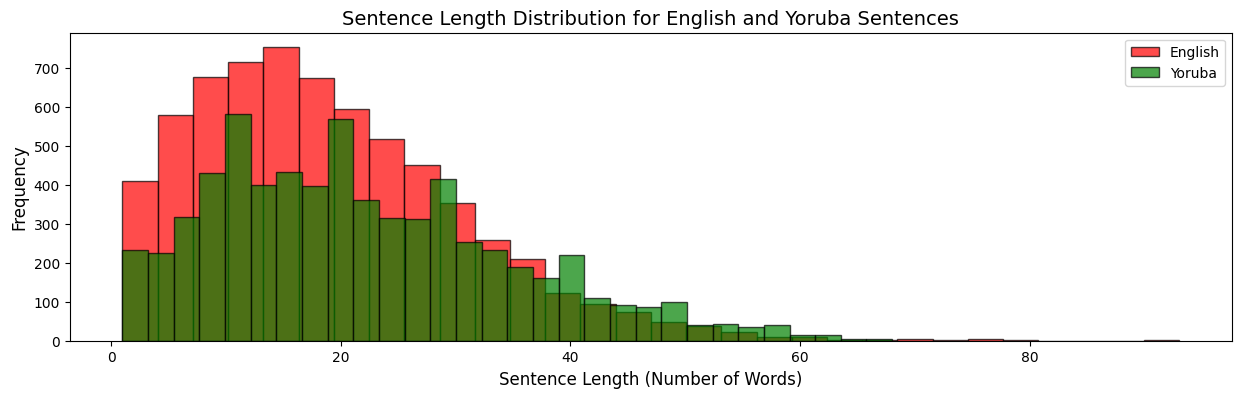

In [ ]:
plt.figure(figsize=(15, 4))

plt.hist(submission_file['English'].apply(lambda x: len(x.split())), bins=30, alpha=0.7, label='English', color='red', edgecolor='black')
plt.hist(submission_file['Yoruba'].apply(lambda x: len(x.split())), bins=30, alpha=0.7, label='Yoruba', color='green', edgecolor='black')

plt.title('Sentence Length Distribution for English and Yoruba Sentences', fontsize=14)
plt.xlabel('Sentence Length (Number of Words)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

## **INFERENCE TIME** `Approximately 1 Hour`

## **Model Evalustion**

In [ ]:
val_dataset['input_text'] = val_dataset['English']
val_dataset['prefix']  = ""

In [ ]:
val_prediction_text = [
                      prefix + ": " + str(input_text)
                      for prefix, input_text in zip(val_dataset["prefix"].tolist(), val_dataset["input_text"].tolist())
                  ]

In [ ]:
val_prediction = model.predict(val_prediction_text)

Generating outputs:   0%|          | 0/850 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/3397 [00:00<?, ?it/s]

In [ ]:
val_dataset['Yoruba_Model'] = val_prediction

In [ ]:
bleu = evaluate.load("sacrebleu")

In [ ]:
bleu_score = bleu.compute(predictions=val_dataset['Yoruba_Model'].apply(lambda x: x.replace(":","")).str.strip(), references=val_dataset['Yoruba'])
print(f"BLEU Score: {bleu_score['score']}")

BLEU Score: 13.004608925479186


## **References and Acknowledgement**

1. ChatGPT
2. Claude AI
3. [Medium Article 1](https://towardsdatascience.com/comparing-facebooks-m2m-to-mt5-in-low-resources-translation-english-yoruba-ef56624d2b75)
4. [Medium Article 2](https://towardsdatascience.com/how-to-train-an-mt5-model-for-translation-with-simple-transformers-30ba5fa66c5f)

## **What we learnt from the competition**

1. Natural Language Processing
2. Transformer Models
3. Transfer Learning
4. Language Translation
5. Low resource languages